In [1]:
#Used libraries
import numpy as np # for linear algebra (multidimensional arrays)
import pandas as pd # data processing, CSV, Json, etc. file I/O 
from matplotlib import pyplot as plt #for plotting 

# Exploratory Analysis

In [2]:
traindf = pd.read_json('train.json', orient='columns')
testdf = pd.read_json('test.json', orient='columns')

Exploring Training-set

In [3]:
#Displaying 20 first rows to discover the general data structure with some values
traindf.head(20)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [4]:
#Information about the training-set (each attribute, its type and the number of its elements)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


we have 39774 elements in total without null ones, ides are of int64 type, cuisine and ingredients are of object type

In [5]:
print("the number of total recipes in the training set is : ", len(traindf))
print("the shape of the taining set is : ", traindf.shape, " :\n ",traindf.shape[0], "objects with ", traindf.shape[1]," attributes each")

the number of total recipes in the training set is :  39774
the shape of the taining set is :  (39774, 3)  :
  39774 objects with  3  attributes each


Test-set exploration and quick overview

In [6]:
testdf.head(20)

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
5,38527,"[baking powder, all-purpose flour, peach slice..."
6,19666,"[grape juice, orange, white zinfandel]"
7,41217,"[ground ginger, white pepper, green onions, or..."
8,28753,"[diced onions, taco seasoning mix, all-purpose..."
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ..."


The target variable is cuisine which is not present in the test-set

In [7]:
#Information about the test-set (each attribute, its type and the number of its elements)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
id             9944 non-null int64
ingredients    9944 non-null object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


We have 9944 elements in total without null ones, ides are of int64 type, ingredients are of object type

In [8]:
print("the number of total recipes in the test-set is : ", len(testdf))
print("the shape of the test set is : ", testdf.shape, " :\n ",testdf.shape[0], "objects with ", testdf.shape[1]," attributes each")
print("the proportion of the test-set is : ", 100*len(testdf)/(len(traindf) + len(testdf)), "% of total data")

the number of total recipes in the test-set is :  9944
the shape of the test set is :  (9944, 2)  :
  9944 objects with  2  attributes each
the proportion of the test-set is :  20.000804537592018 % of total data


# In depth Data and target variable analysis

### 1- Our training Set

In [9]:
print("The number of distinct countries (same class recipes) is : ", len(traindf.cuisine.unique()))
print("These countries are : ", pd.DataFrame(traindf.cuisine.unique()))

The number of distinct countries (same class recipes) is :  20
These countries are :                 0
0          greek
1    southern_us
2       filipino
3         indian
4       jamaican
5        spanish
6        italian
7        mexican
8        chinese
9        british
10          thai
11    vietnamese
12  cajun_creole
13     brazilian
14        french
15      japanese
16         irish
17        korean
18      moroccan
19       russian


We have more than 2 classes (countries) to predict, so we're dealing with a multi-class classification problem

In [10]:
print("The number of recipes per country is : " )

n_recipes_per_country = traindf.groupby("cuisine")['id'].count().sort_values(ascending =False).reset_index().rename(columns={'cuisine':"cuisine (country)", 'id':"Number of recipes"})
n_recipes_per_country

The number of recipes per countries is : 


,cuisine (country),Number of recipes
0,italian,7838
1,mexican,6438
2,southern_us,4320
3,indian,3003
4,chinese,2673
5,french,2646
6,cajun_creole,1546
7,thai,1539
8,japanese,1423
9,greek,1175


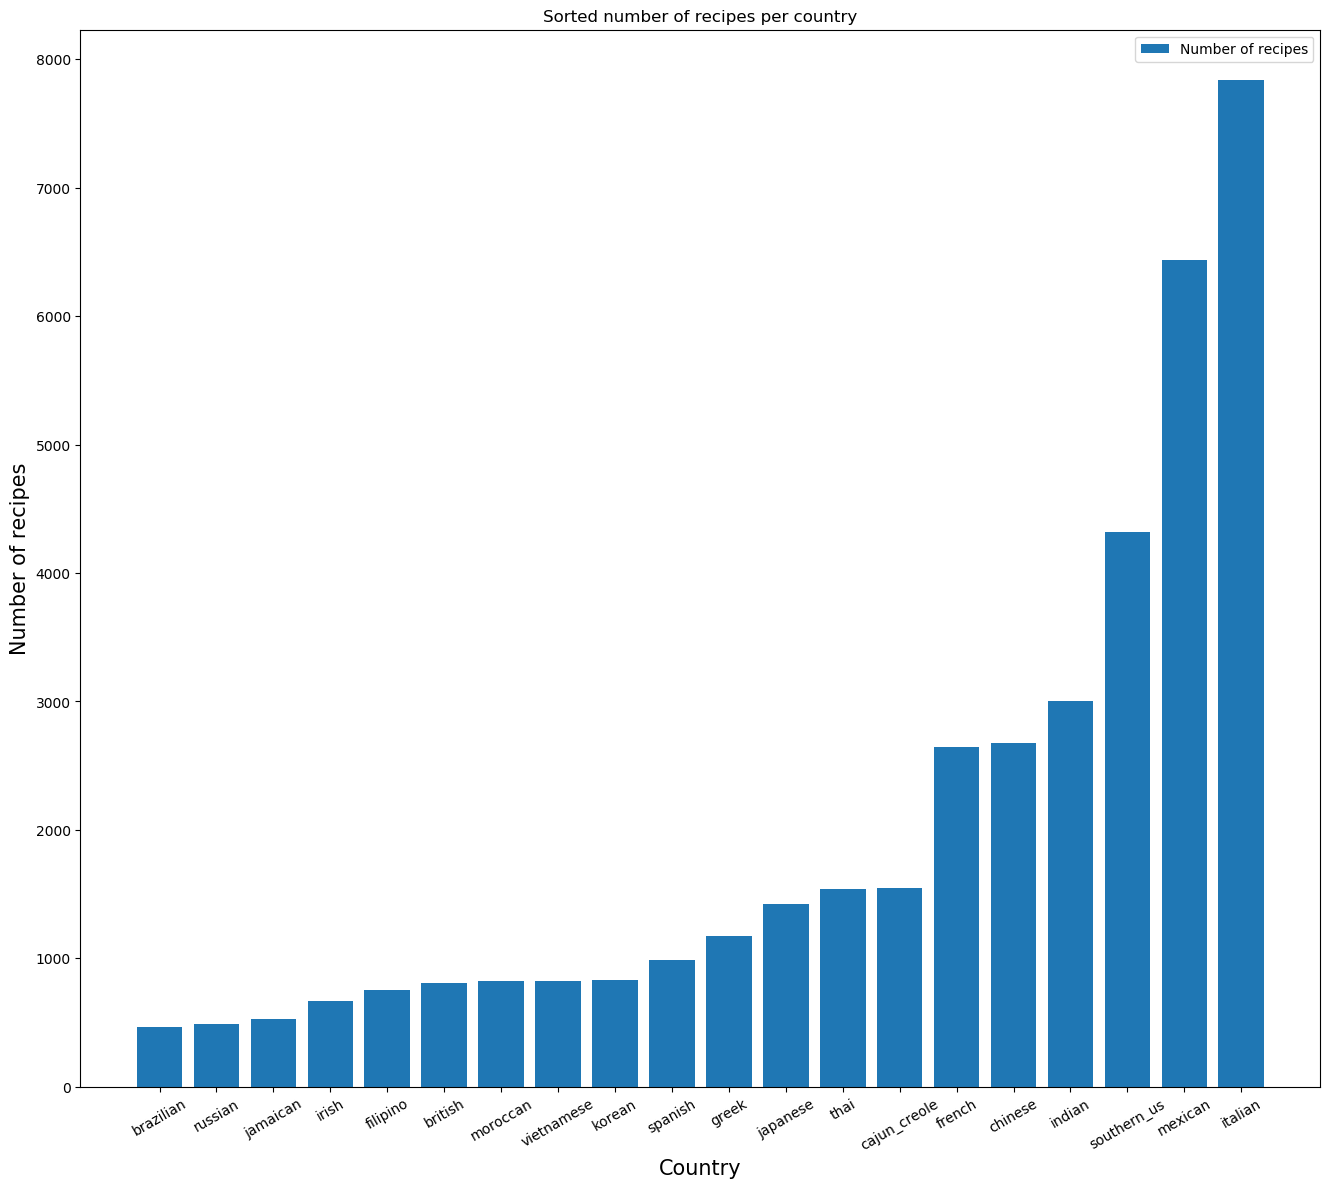

In [16]:
# plotting those recipes for more visibity
#label = "number of recipes per country"

x_axis = n_recipes_per_country["cuisine (country)"].tolist()[::-1]
y_axis = n_recipes_per_country["Number of recipes"].tolist()[::-1]
index = np.arange(len(x_axis))
plt.figure(figsize=(16, 14), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(x_axis, y_axis, label ="Number of recipes")
plt.xticks(index, x_axis, fontsize=10, rotation = 30)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of recipes", fontsize=15)
plt.legend()
plt.title("Sorted number of recipes per country")
plt.show()


From the above bar-chart we can notice that the most commons recipe per country are Italian, mexican and southern US <br/>
However, the most uncommon recipes per country in our Training model are : Brazilian, Russian and jamaican<br/>
The number of recipes increases gradually, except for the six last recipes where the number goes up in more bigger ranges


In [27]:
print("The number of ingredients per recipe is (recipes not necessarily identical) : " )

n_recipes_per_meal = traindf.ingredients.map(lambda l: len(l)).value_counts().sort_index().reset_index().rename(columns={'index':'number_of_ingredients_per_recipe', 'ingredients':'number_of_recipes'})
n_recipes_per_meal

The number of ingredients per recipe is (recipes not necessarily identical) : 


,number_of_ingredients_per_recipe,number_of_recipes
0,1,22
1,2,193
2,3,549
3,4,1128
4,5,1891
5,6,2662
6,7,3329
7,8,3556
8,9,3753
9,10,3677


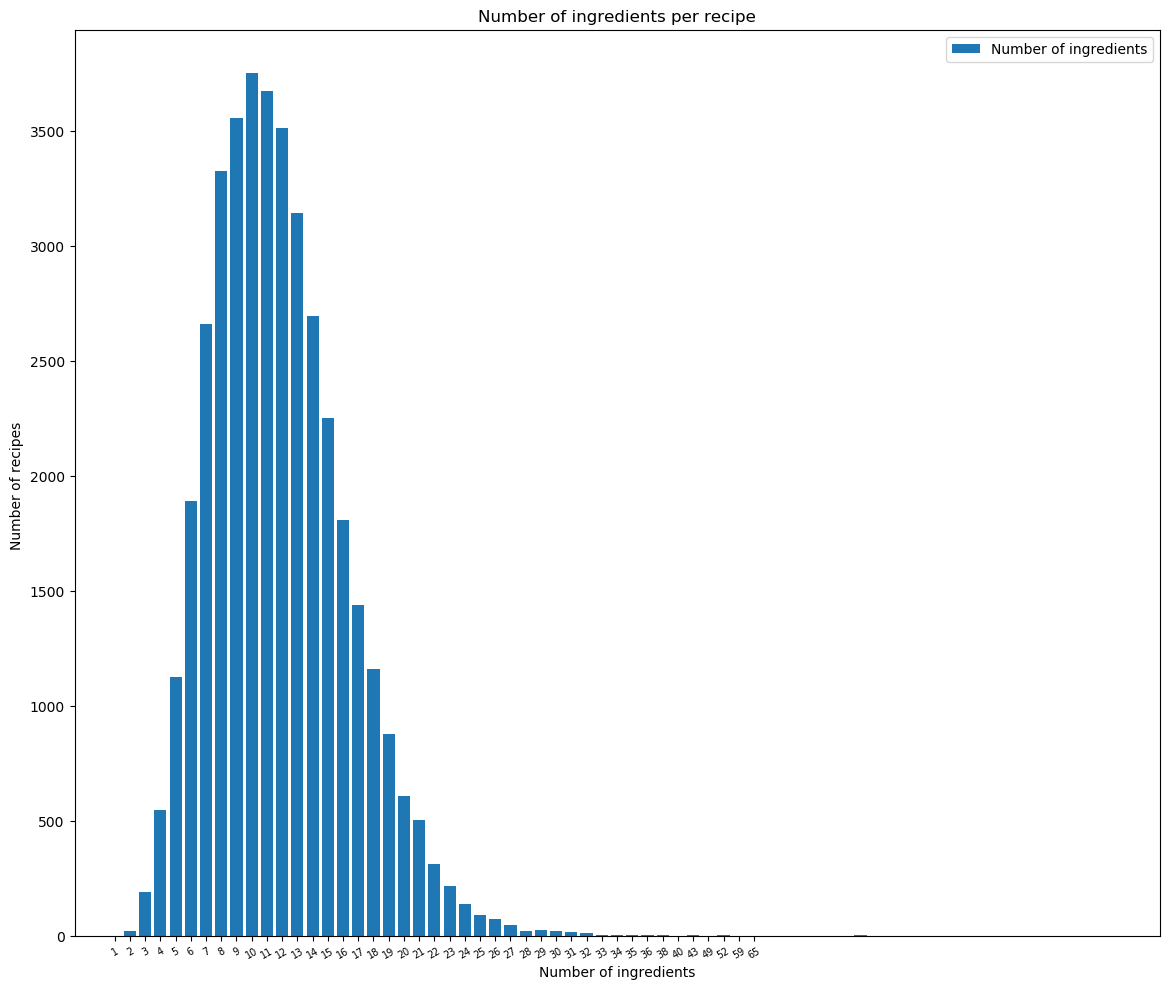

In [31]:
x_axis = n_recipes_per_meal["number_of_ingredients_per_recipe"].tolist()
y_axis = n_recipes_per_meal["number_of_recipes"].tolist()
index = np.arange(len(x_axis))
plt.figure(figsize=(14, 12), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(x_axis, y_axis, label ="Number of ingredients")
plt.xticks(index, x_axis, fontsize=7, rotation = 30)
plt.xlabel("Number of ingredients", fontsize=10)
plt.ylabel("Number of recipes ", fontsize=10)
plt.legend()
plt.title("Number of ingredients per recipe")
plt.show()

The insight we can get from the table above is that, in our Training set, some recipes do contain one single ingredient, which can be an anomaly that might affect our predictions, we will find out when we dig into the test set so that we can decide<br/>
There are 1 recipe with 65 ingredients, 22 recipes with 1 ingredient and 3753 recipes with 9 ingredients <br/>
The given histogram shows that the range of ingredients vary between 1 and 65 ingredients, most of the recipes are between 5 and 18 ingredients

### Visualing extreme cases' ingredients 

- one ingredient's recipes :

In [71]:
ingredients_set = traindf.ingredients
countries = traindf.cuisine
df_one_ingredient = []
for ingredients, country in zip(ingredients_set, countries) :
    if len(ingredients) == 1 :
        df_one_ingredient.append((country, ingredients[0]))
pd.DataFrame(df_one_ingredient, columns=['Country', 'Ingredient']).sort_values(by='Country').reset_index(drop= True)

,Country,Ingredient
0,french,haricots verts
1,french,butter
2,greek,phyllo
3,indian,unsalted butter
4,indian,plain low-fat yogurt
5,indian,unsalted butter
6,indian,cumin seed
7,indian,butter
8,indian,unsalted butter
9,italian,cherry tomatoes
